# 🌸 1. Imports and Dataset Loading

In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

## 📥 2. Load and Inspect the Iris Dataset

In [3]:
iris = datasets.load_iris()

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df['target_name'] = df['target'].apply(
    lambda x: iris.target_names[0] if x == 0 else iris.target_names[1] if x == 1 else iris.target_names[2])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 📊 3. Visual Explorations

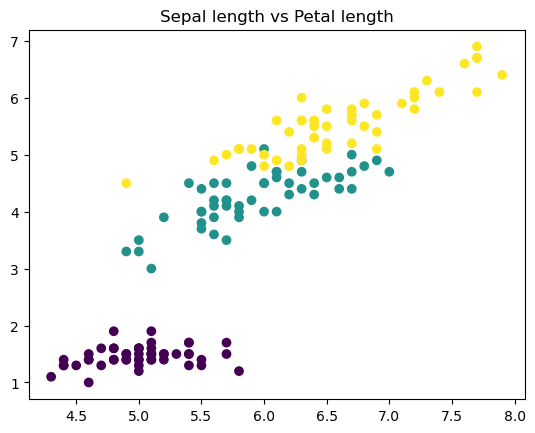

In [9]:
plt.scatter(iris.data[:,0], iris.data[:,2], c=iris.target)
plt.title('Sepal length vs Petal length')
plt.show()

In [10]:
df['target_name'].value_counts()

target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## 🔍 4. Analyze Features per Species

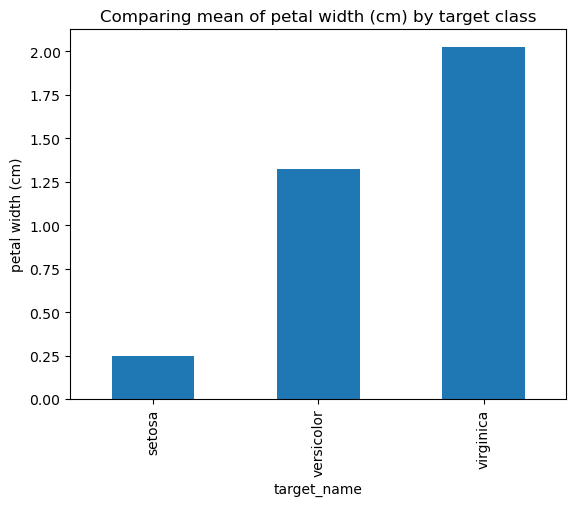

In [11]:
def charting(n):
    df.groupby(['target_name']).mean()[df.columns[n]].plot(kind='bar')
    plt.title('Comparing mean of ' + df.columns[n] + ' by target class')
    plt.ylabel(df.columns[n])
    plt.show()

charting(3)

## 🤖 5. KNN Classification Model

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42, stratify=iris.target)

In [16]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [17]:
knn.predict(x_test)

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2,
       1])

In [18]:
y_test

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2,
       1])

In [19]:
# Accuracy comparison
knn.score(x_test, y_test)

0.9777777777777777

## 📈 6. Best K Selection via Accuracy

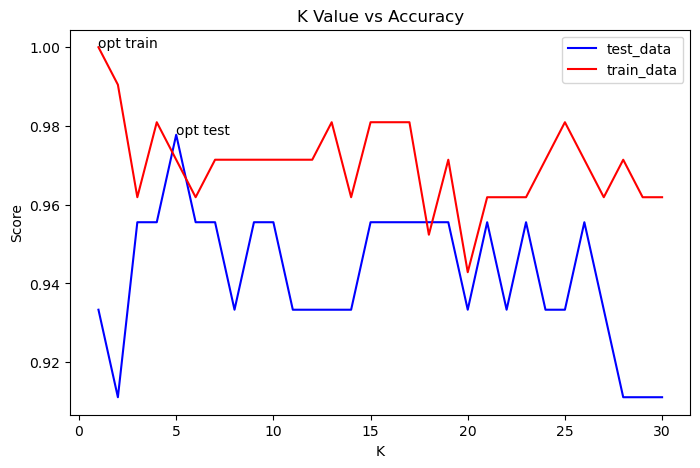

The best K is 5


In [20]:
score_test = []
score_train = []
for i in range(1, 31):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train, y_train)
    score_test.append(knn1.score(x_test, y_test))
    score_train.append(knn1.score(x_train, y_train))

plt.figure(figsize=(8, 5))
plt.plot(range(1, 31), score_test, color='b')
plt.plot(range(1, 31), score_train, color='r')
plt.legend(['test_data', 'train_data'])
plt.title('K Value vs Accuracy')
plt.xlabel('K')
plt.ylabel('Score')
plt.text(score_test.index(max(score_test)) + 1, max(score_test), 'opt test')
plt.text(score_train.index(max(score_train)) + 1, max(score_train), 'opt train')
plt.show()

print('The best K is {}'.format(score_test.index(max(score_test)) + 1))

## 🧾 7. Model Performance Report

In [21]:
from sklearn import metrics
print(metrics.classification_report(y_test, knn.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## 🌳 8. Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
tree1 = DecisionTreeClassifier()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, stratify=iris.target, random_state=32)

In [25]:
tree1.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
tree1.predict(x_test)

array([1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0,
       0, 2, 2, 0, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 0, 0,
       2])

In [27]:
y_test

array([1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 0, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 0, 0,
       2])

In [28]:
tree1.score(x_test, y_test)

0.9777777777777777

## 🌲 9. Decision Tree Visualization

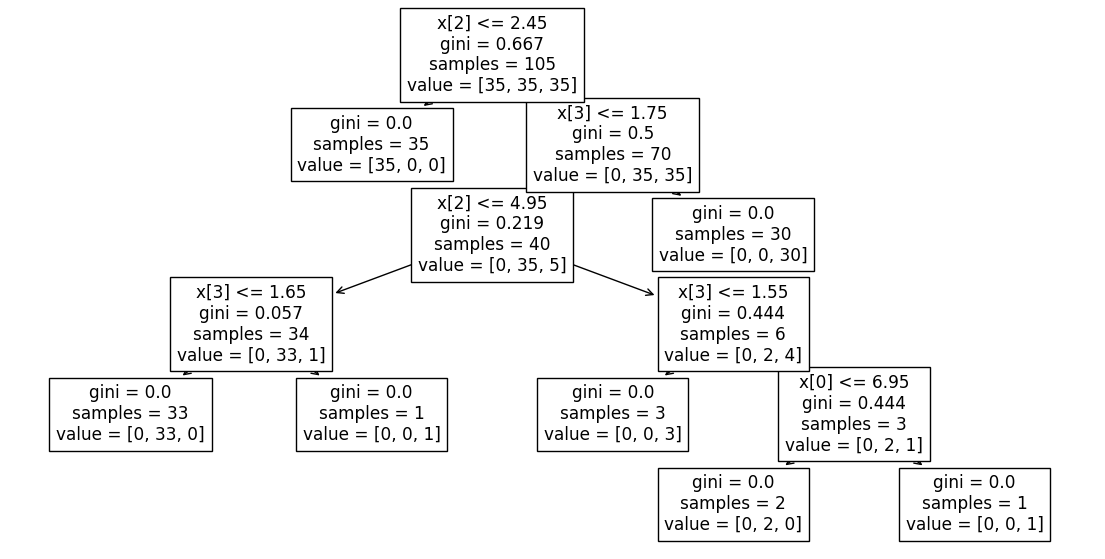

In [29]:
from sklearn import tree
plt.figure(figsize=(14, 7))
tree.plot_tree(tree1)
plt.show()